In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
test = pd.read_csv("/home/oleg/.kaggle/competitions/ds-ai-spring-hack/test.csv")
train = pd.read_csv("/home/oleg/.kaggle/competitions/ds-ai-spring-hack/train.csv")

/home/oleg/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [220]:
1 - train.is_fake.mean()

0.9963339807522285

In [4]:
train.head()

,comment_id,company_id,user_id,product_id,comment,rating,date_created,user_date_created,user_ip,user_agent,is_fake
0,1,2169053,91933,6.0,компания не выполнила заказ без обьяснения пр...,1,2014-10-23 20:26:44,2010-02-03 21:03:22,178.92.70.220,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,False
1,2,709306,91933,2.0,"Впервые встретился такой професиональный, отве...",5,2016-12-10 08:38:27,2010-02-03 21:03:22,94.179.59.162,Mozilla/5.0 (Linux; Android 5.1.1; C6602 Build...,False
2,3,35287,91933,NaN,"Несерйозная, некоректная менеджер інтернет маг...",1,2017-02-11 15:55:14,2010-02-03 21:03:22,37.73.137.188,Mozilla/5.0 (Linux; Android 6.0; ASUS_X008D Bu...,False
3,4,1778322,91933,1.0,"Не рекомендую. Не отвечают, не выполняют заказы.",1,2017-06-26 18:00:45,2010-02-03 21:03:22,37.73.149.180,Mozilla/5.0 (Linux; Android 6.0; ASUS_X008D Bu...,False
4,5,2821533,91933,NaN,"На письма не отвечают, заказы не выполняют. Не...",1,2017-07-06 16:57:40,2010-02-03 21:03:22,37.73.221.126,Mozilla/5.0 (Linux; Android 6.0; ASUS_X008D Bu...,False


In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281499 entries, 0 to 1281498
Data columns (total 12 columns):
comment_id           1281499 non-null int64
company_id           1281499 non-null int64
user_id              1281499 non-null int64
product_id           829477 non-null float64
comment              1281499 non-null object
rating               1281499 non-null int64
date_created         1281499 non-null object
user_date_created    1281499 non-null object
user_ip              1281282 non-null object
user_agent           1281280 non-null object
is_fake              1281499 non-null float64
company_was_faked    1281499 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 117.3+ MB


In [6]:
train.is_fake = train.is_fake.astype(float)

In [27]:
# Understanding company ID

In [37]:
len(train.company_id.unique())

60497

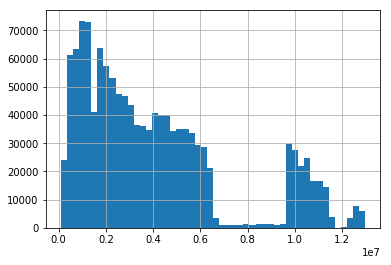

In [233]:
train.user_id.hist(bins=50)
plt.show()

In [235]:
len(train[train.is_fake == True].user_id.unique())

796

In [75]:
train.is_fake = train.is_fake.astype(float)

In [11]:
train.groupby(['company_id']).mean().is_fake.describe()

count    60497.000000
mean         0.000461
std          0.013944
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.891156
Name: is_fake, dtype: float64

In [21]:
fake_companies_idx = train[train.is_fake == 1].company_id.unique()

In [23]:
train[train.company_id.isin(fake_companies_idx)].groupby(['company_id']).mean().is_fake.describe()

count    354.000000
mean       0.078811
std        0.164706
min        0.000534
25%        0.011205
50%        0.023533
75%        0.052632
max        0.891156
Name: is_fake, dtype: float64

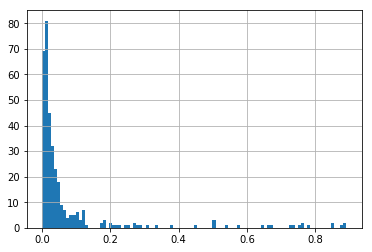

In [27]:
train[train.company_id.isin(fake_companies_idx)].groupby(['company_id']).mean().is_fake.hist(bins=100)

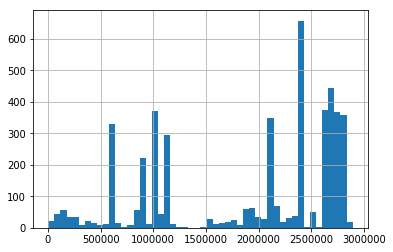

In [26]:
train[train.is_fake == True].company_id.hist(bins=50)
plt.show()

In [32]:
train.company_id.unique()

array([2169053,  709306,   35287, ...,  985988, 2835980, 2115588])

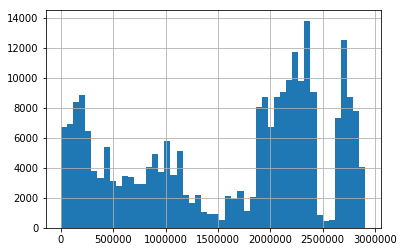

In [28]:
test.company_id.hist(bins=50)
plt.show()

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281499 entries, 0 to 1281498
Data columns (total 11 columns):
comment_id           1281499 non-null int64
company_id           1281499 non-null int64
user_id              1281499 non-null int64
product_id           829477 non-null float64
comment              1281499 non-null object
rating               1281499 non-null int64
date_created         1281499 non-null object
user_date_created    1281499 non-null object
user_ip              1281282 non-null object
user_agent           1281280 non-null object
is_fake              1281499 non-null bool
dtypes: bool(1), float64(1), int64(4), object(5)
memory usage: 99.0+ MB


In [15]:
train.describe()

,comment_id,company_id,user_id,product_id,rating
count,1.281499e+06,1.281499e+06,1.281499e+06,8.294770e+05,1.281499e+06
mean,7.560583e+05,1.578363e+06,3.992246e+06,5.280805e+05,4.456343e+00
std,4.532980e+05,9.263703e+05,3.155575e+06,3.729128e+05,1.168417e+00
min,1.000000e+00,7.000000e+00,9.193300e+04,1.000000e+00,1.000000e+00
25%,3.657095e+05,6.839970e+05,1.534710e+06,1.939630e+05,5.000000e+00
50%,7.372820e+05,1.936021e+06,3.137744e+06,4.719260e+05,5.000000e+00
75%,1.127584e+06,2.331252e+06,5.357894e+06,8.382780e+05,5.000000e+00
max,1.655744e+06,2.908769e+06,1.296884e+07,1.301995e+06,5.000000e+00


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281499 entries, 0 to 1281498
Data columns (total 12 columns):
comment_id           1281499 non-null int64
company_id           1281499 non-null int64
user_id              1281499 non-null int64
product_id           829477 non-null float64
comment              1281499 non-null object
rating               1281499 non-null int64
date_created         1281499 non-null object
user_date_created    1281499 non-null object
user_ip              1281282 non-null object
user_agent           1281280 non-null object
is_fake              1281499 non-null float64
company_was_faked    1281499 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 117.3+ MB


In [59]:
features = pd.DataFrame(train)

In [61]:
features

,comment_id,company_id,user_id,product_id,comment,rating,date_created,user_date_created,user_ip,user_agent,is_fake,company_was_faked
0,1,2169053,91933,6.0,компания не выполнила заказ без обьяснения пр...,1,2014-10-23 20:26:44,2010-02-03 21:03:22,178.92.70.220,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,0.0,0.0
1,2,709306,91933,2.0,"Впервые встретился такой професиональный, отве...",5,2016-12-10 08:38:27,2010-02-03 21:03:22,94.179.59.162,Mozilla/5.0 (Linux; Android 5.1.1; C6602 Build...,0.0,0.0
2,3,35287,91933,NaN,"Несерйозная, некоректная менеджер інтернет маг...",1,2017-02-11 15:55:14,2010-02-03 21:03:22,37.73.137.188,Mozilla/5.0 (Linux; Android 6.0; ASUS_X008D Bu...,0.0,0.0
3,4,1778322,91933,1.0,"Не рекомендую. Не отвечают, не выполняют заказы.",1,2017-06-26 18:00:45,2010-02-03 21:03:22,37.73.149.180,Mozilla/5.0 (Linux; Android 6.0; ASUS_X008D Bu...,0.0,0.0
4,5,2821533,91933,NaN,"На письма не отвечают, заказы не выполняют. Не...",1,2017-07-06 16:57:40,2010-02-03 21:03:22,37.73.221.126,Mozilla/5.0 (Linux; Android 6.0; ASUS_X008D Bu...,0.0,0.0
5,6,2770517,91933,NaN,я заказывала каталог с ценами по купальникам н...,1,2014-05-23 21:06:03,2010-02-03 21:03:22,95.132.127.210,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,0.0,0.0
6,7,2686753,91933,5.0,"Не понравилось, что пишут не верную информацию...",3,2016-10-22 12:35:24,2010-02-03 21:03:22,91.202.144.154,Mozilla/5.0 (Linux; Android 4.4.4; C6602 Build...,0.0,0.0
7,8,2686383,91951,4.0,"компания сработала хорошо, связались за пол дн...",5,2016-12-01 13:01:50,2010-02-03 22:17:55,95.132.4.59,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,0.0,0.0
8,9,2294801,91962,140.0,"Все понравилось. Качественный товар, заказ был...",5,2016-06-01 21:55:43,2010-02-03 23:03:27,212.90.61.2,Mozilla/5.0 (Windows NT 6.1; rv:46.0) Gecko/20...,0.0,0.0
9,10,1879360,91989,NaN,Имел неосторожность купить в 2013 году после в...,1,2013-11-28 16:26:08,2010-02-04 03:08:56,91.241.146.34,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,0.0,0.0


In [33]:
features.company_was_faked = features.company_id.isin(fake_companies_idx).astype(float)

/home/oleg/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [62]:
features['company_was_faked'] = features.company_id.isin(fake_companies_idx).astype(float)

In [60]:
features['company_percent_faked'].apply(features.groupby(['company_id']).is_fake.mean()[x] for x in x.comp)

KeyError: 'company_percent_faked'

In [57]:
features[features.company_percent_faked.notnull()]

,comment_id,company_id,user_id,product_id,comment,rating,date_created,user_date_created,user_ip,user_agent,is_fake,company_was_faked,company_percent_faked
7,8,2686383,91951,4.0,"компания сработала хорошо, связались за пол дн...",5,2016-12-01 13:01:50,2010-02-03 22:17:55,95.132.4.59,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,0.0,0.0,0.0
10,11,1879923,92038,534.0,Заказал Детское велокресло TI-BT-BCS-0003 - 2...,2,2014-07-01 14:17:03,2010-02-04 10:33:56,109.87.170.227,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,0.0,0.0,0.0
21,33,2652292,92277,257.0,Мне понравилось заказывать у этой компании. Об...,5,2016-10-27 19:26:29,2010-02-04 17:08:41,78.111.190.145,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,0.0,0.0,0.0
28,40,2424177,92369,NaN,Заказывал установку сигнализации на автомобиль...,5,2014-03-09 14:24:18,2010-02-04 23:09:26,46.46.75.244,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,0.0,0.0,0.0
70,85,1933182,93123,677.0,"Все быстро и оперативно, так держать!",5,2016-02-29 09:59:50,2010-02-08 00:03:57,195.230.103.3,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,0.0,0.0,0.0
71,87,2807070,93127,47.0,"Продавец ставит не корректный статус товара ""В...",3,2017-10-25 09:28:56,2010-02-08 00:49:16,176.36.49.236,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,0.0,0.0,0.0
107,127,320165,93815,347.0,Лучшие рекомендации!!! Сделка прошла успешно!!!,5,2016-09-29 10:10:23,2010-02-09 19:57:17,176.116.71.91,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,0.0,0.0,0.0
113,133,107084,93815,212.0,"Сделка прошла успешно, всем рекомендую!!!",5,2016-12-01 09:19:36,2010-02-09 19:57:17,176.116.71.102,Mozilla/5.0 (Windows NT 6.1; rv:48.0) Gecko/20...,0.0,0.0,0.0
122,150,2832989,93815,284.0,"Спасибо, товар получил, всё отлично!",5,2017-04-06 14:47:08,2010-02-09 19:57:17,176.116.71.40,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,0.0,0.0,0.0
131,162,2168678,93915,142.0,"Заказывал кимоно,покупкой остался доволен.",5,2013-10-04 09:38:53,2010-02-10 09:38:17,93.75.3.215,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,0.0,0.0,0.0


In [63]:
from user_agents import parse

In [159]:
# create user agents hash map
ua_dict = {}
for ua in train.user_agent.values:
    if str(ua) != "nan" and ua not in ua_dict:
        ua_dict[ua] = parse(ua)

In [176]:
ua_features = pd.DataFrame(index = train.index)

In [187]:
train['is_mobile'] = train.user_agent.apply(lambda x: \
                                  ua_dict[x].is_mobile if str(x).lower() != "nan" else False)
train['is_tablet'] = train.user_agent.apply(lambda x: \
                                  ua_dict[x].is_tablet if str(x).lower() != "nan" else False)
train['is_touch_capable'] = train.user_agent.apply(lambda x: \
                                  ua_dict[x].is_touch_capable if str(x).lower() != "nan" else False)
train['is_pc'] = train.user_agent.apply(lambda x: \
                                  ua_dict[x].is_pc if str(x).lower() != "nan" else False)
train['is_bot'] = train.user_agent.apply(lambda x: \
                                  ua_dict[x].is_bot if str(x).lower() != "nan" else False)

In [189]:
train['browser_family'] = train.user_agent.apply(lambda x: \
                                  ua_dict[x].browser.family if str(x).lower() != "nan" else "")
train['browser_version_string'] = train.user_agent.apply(lambda x: \
                                  ua_dict[x].browser.version_string if str(x).lower() != "nan" else "")
train['os_family'] = train.user_agent.apply(lambda x: \
                                  ua_dict[x].os.family if str(x).lower() != "nan" else "")
train['os_version_string'] = train.user_agent.apply(lambda x: \
                                  ua_dict[x].os.version_string if str(x).lower() != "nan" else "")
train['device_brand'] = train.user_agent.apply(lambda x: \
                                  ua_dict[x].device.family if str(x).lower() != "nan" else "")
train['device_model'] = train.user_agent.apply(lambda x: \
                                  ua_dict[x].device.model if str(x).lower() != "nan" else "")

In [213]:
train['device_family'] = train.user_agent.apply(lambda x: \
                                  ua_dict[x].device.family if str(x).lower() != "nan" else "")

In [193]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281499 entries, 0 to 1281498
Data columns (total 24 columns):
comment_id                1281499 non-null int64
company_id                1281499 non-null int64
user_id                   1281499 non-null int64
product_id                829477 non-null float64
comment                   1281499 non-null object
rating                    1281499 non-null int64
date_created              1281499 non-null object
user_date_created         1281499 non-null object
user_ip                   1281282 non-null object
user_agent                1281280 non-null object
is_fake                   1281499 non-null float64
company_was_faked         1281499 non-null float64
is_mobile                 1281499 non-null bool
is_tablet                 1281499 non-null bool
is_touch_capable          1281499 non-null bool
is_pc                     1281499 non-null bool
is_bot                    1281499 non-null bool
browser_family            1281499 non-null object

In [93]:
user_agent = parse('Mozilla/5.0 (Linux; Android 7.0; FRD-L09 Build/HUAWEIFRD-L09) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.84 Mobile Safari/537.36')

In [111]:
# Accessing user agent's browser attributes
# print(user_agent.browser)  # returns Browser(family=u'Mobile Safari', version=(5, 1), version_string='5.1')
print(user_agent.browser.family)  # returns 'Mobile Safari'
# print(user_agent.browser.version)  # returns (5, 1)
print(user_agent.browser.version_string)   # returns '5.1'

# Accessing user agent's operating system properties
# print(user_agent.os)  # returns OperatingSystem(family=u'iOS', version=(5, 1), version_string='5.1')
print(user_agent.os.family)  # returns 'iOS'
# print(user_agent.os.version)  # returns (5, 1)
print(user_agent.os.version_string)  # returns '5.1'

# Accessing user agent's device properties
print(user_agent.device)  # returns Device(family='iPhone')
print(user_agent.device.family)  # returns 'iPhone'

print(user_agent.is_mobile) # returns True
print(user_agent.is_tablet) # returns False
print(user_agent.is_touch_capable) # returns False
print(user_agent.is_pc) # returns False
print(user_agent.is_bot) # returns False

Chrome Mobile
62.0.3202
Android
7.0
Device(family='FRD-L09', brand='Generic_Android', model='FRD-L09')
FRD-L09
True
False
True
False
False


In [232]:
print(sorted(train[train.is_fake == True].user_ip.unique()))

['104.200.24.17', '109.104.168.220', '109.163.234.8', '109.254.49.24', '119.81.109.51', '119.81.109.59', '119.81.109.62', '121.100.143.159', '121.100.143.169', '122.152.167.12', '122.152.167.190', '124.109.1.207', '128.52.128.105', '130.180.208.8', '130.180.209.195', '130.180.211.57', '130.180.212.133', '130.180.212.175', '130.180.212.32', '130.180.212.74', '134.249.177.32', '136.0.98.173', '136.0.98.177', '136.0.98.18', '136.0.98.52', '139.162.250.124', '139.59.121.220', '141.101.8.14', '141.255.189.161', '142.44.166.241', '142.91.189.91', '142.91.189.93', '146.185.27.139', '149.154.152.177', '151.1.216.179', '151.80.254.227', '159.122.105.116', '159.122.105.124', '159.122.86.186', '159.203.47.229', '161.202.89.230', '162.220.246.230', '163.172.170.161', '163.172.191.54', '163.172.217.50', '166.88.123.67', '167.114.77.220', '171.25.193.132', '173.208.213.114', '173.239.230.3', '173.254.251.44', '173.254.251.45', '176.104.28.71', '176.104.31.72', '176.104.52.229', '176.104.53.71', '176

In [242]:
train[train.is_fake == True]

,comment_id,company_id,user_id,product_id,comment,rating,date_created,user_date_created,user_ip,user_agent,...,is_touch_capable,is_pc,is_bot,browser_family,browser_version_string,os_family,os_version_string,device_brand,device_model,device_family
3788,4421,884386,144672,3917.0,Огромное спасибо за посылку! Крылья бабочек-су...,5,2016-05-22 21:42:30,2010-07-16 16:24:41,188.230.64.94,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,...,False,True,False,Chrome,50.0.2661,Windows 7,,Other,None,Other
151859,173261,900556,876510,NaN,"Спасибо Вашему магазину за качественный товар,...",5,2016-11-13 15:31:08,2013-01-03 19:53:38,95.133.238.2,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,...,False,True,False,Chrome,54.0.2840,Windows 7,,Other,None,Other
151860,173262,177111,876510,NaN,"Спасибо за быструю доставку,за качественный то...",5,2016-05-22 15:39:18,2013-01-03 19:53:38,178.94.172.102,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,...,False,True,False,Chrome,47.0.2526,Windows 7,,Other,None,Other
315022,359557,2830808,1493059,NaN,"заказываю не впервые, как впрочем и всегда рад...",5,2016-11-20 13:16:01,2013-10-08 08:50:47,91.237.110.37,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,...,False,True,False,Chrome,54.0.2840,Windows 7,,Other,None,Other
315023,359558,134808,1493059,NaN,"очень довольна обслуживание, все четко и в ого...",5,2016-11-24 07:02:15,2013-10-08 08:50:47,91.237.108.117,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,...,False,True,False,Chrome,54.0.2840,Windows 7,,Other,None,Other
326894,373374,2690667,1590565,317344.0,Очень положительное впечатление о компании. Ка...,5,2016-03-14 09:40:52,2013-10-12 12:50:24,95.158.12.26,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,...,False,True,False,Chrome,48.0.2564,Windows 10,,Other,None,Other
359379,410600,2317593,1734825,NaN,Всем рекомендую етот магазин хорошая девушка Е...,5,2016-02-02 12:04:46,2013-11-15 16:28:49,195.95.222.194,Mozilla/5.0 (Linux; Android 5.0.2; Lenovo A600...,...,True,False,False,Chrome Mobile,47.0.2526,Android,5.0.2,Lenovo A6000,A6000,Lenovo A6000
367351,419634,884386,1768774,357221.0,Товаром довольна - работает отлично. Отправили...,5,2015-12-11 14:24:46,2013-11-24 12:24:42,37.55.213.40,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,...,False,True,False,Chrome,47.0.2526,Windows 7,,Other,None,Other
367352,419635,2659109,1768774,357436.0,"Забрала посылку, спасибо! Довольна на 100%. Ка...",5,2016-03-15 16:28:34,2013-11-24 12:24:42,95.132.236.240,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,...,False,True,False,Chrome,48.0.2564,Windows 7,,Other,None,Other
443121,505748,690602,2088368,NaN,"Большое Спасибо Владиславу за его работу, прия...",5,2014-11-11 10:08:55,2014-02-10 09:50:00,94.179.138.149,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,...,False,True,False,Opera,25.0.1614,Windows 7,,Other,None,Other
